##### OpenCV 多物件追蹤
這篇教學會介紹兩種可以將 OpenCV 單物件追蹤改為「多物件」追蹤的方法，透過多物件追蹤的方法，即時追蹤攝影機影像裡的多個物件。

* 參考：[OpenCV 單物件追蹤](https://steam.oxxostudio.tw/category/python/ai/ai-tracker.html)

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 同時使用多次單物件追蹤 
延伸「OpenCV 單物件追蹤」文章，使用多次單物件追蹤的功能，就能實現多物件追蹤的效果，\
下方的程式碼執行後，會設定三組追蹤器，接著讀取一支影片，讀取後標記影片裡的三個物件，\
標記完成就會開始追蹤 ( 實測如果超過兩個物件，就會有一些效能上的問題 )。

* 參考：[OpenCV 單物件追蹤](https://steam.oxxostudio.tw/category/python/ai/ai-tracker.html)

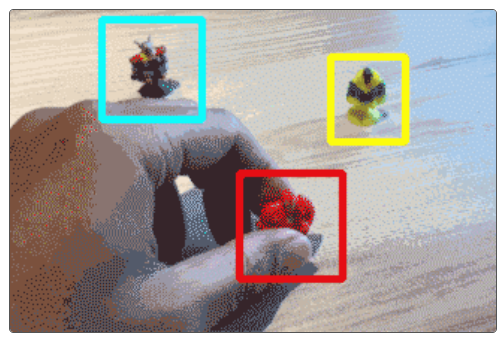

In [ ]:
import cv2

tracker_list = []
for i in range(3):
    tracker = cv2.TrackerCSRT_create()        # 創建三組追蹤器
    tracker_list.append(tracker)
colors = [(0,0,255),(0,255,255),(255,255,0)]  # 設定三個外框顏色
tracking = False                              # 設定 False 表示尚未開始追蹤

cap = cv2.VideoCapture('test.mov')            # 讀取某個影片
a = 0                                         # 刪減影片影格使用
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    frame = cv2.resize(frame,(400,230))       # 縮小尺寸，加快速度
    keyName = cv2.waitKey(1)
    # 為了避免影片影格太多，所以採用 10 格取一格，加快處理速度
    if a%10 == 0:
        if keyName == ord('q'):
            break
        if tracking == False:
            # 如果尚未開始追蹤，就開始標記追蹤物件的外框
            for i in tracker_list:
                area = cv2.selectROI('oxxostudio', frame, showCrosshair=False, fromCenter=False)
                i.init(frame, area)    # 初始化追蹤器
            tracking = True            # 設定可以開始追蹤
        if tracking:
            for i in range(len(tracker_list)):
                success, point = tracker_list[i].update(frame)   # 追蹤成功後，不斷回傳左上和右下的座標
                if success:
                    p1 = [int(point[0]), int(point[1])]
                    p2 = [int(point[0] + point[2]), int(point[1] + point[3])]
                    cv2.rectangle(frame, p1, p2, colors[i], 3)   # 根據座標，繪製四邊形，框住要追蹤的物件

        cv2.imshow('oxxostudio', frame)
    a = a + 1

cap.release()
cv2.destroyAllWindows()

##### 使用 MultiTracker 進行多物件追蹤 
OpenCV 本身有提供多物件追蹤的方法：cv2.legacy.MultiTracker_create()，透過這個方法，也可以追蹤多個物件，\
下方的程式碼執行後，會創建多物件追蹤器，接著透過迴圈的方式，指定每個範圍要使用的追蹤演算法，就可以進行多物件追蹤。

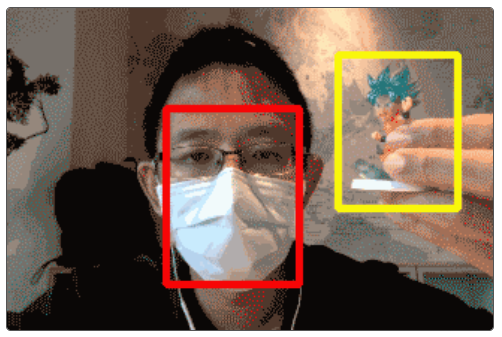

In [ ]:
import cv2

multiTracker = cv2.legacy.MultiTracker_create()  # 建立多物件追蹤器
tracking = False                                 # 設定追蹤尚未開始
colors = [(0,0,255),(0,255,255),(255,0,0)]       # 建立外框色彩清單

cap = cv2.VideoCapture(0)                        # 讀取攝影鏡頭
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    frame = cv2.resize(frame,(1080,720))         # 縮小尺寸加快速度
    keyName = cv2.waitKey(50)

    if keyName == ord('q'):
        break
    # 按下 a 的時候開始標記物件外框
    if keyName == ord('a'):
        for i in range(3):
            area = cv2.selectROI('oxxostudio', frame, showCrosshair=False, fromCenter=False)
            # 標記外框後設定該物件的追蹤演算法
            tracker = cv2.legacy.TrackerCSRT_create()
            # 將該物件加入 multiTracker
            multiTracker.add(tracker, frame, area)
        # 設定 True 開始追蹤
        tracking = True
    if tracking:
        # 更新 multiTracker
        success, points = multiTracker.update(frame)
        a = 0
        if success:
            for i in  points:
                p1 = (int(i[0]), int(i[1]))
                p2 = (int(i[0] + i[2]), int(i[1] + i[3]))
                # 標記物件外框
                cv2.rectangle(frame, p1, p2, colors[a], 3)
                a = a + 1
    cv2.imshow('oxxostudio', frame)

cap.release()
cv2.destroyAllWindows()